# Project
### In this notebook, we will import reviews from csv files and analyze correlation between sentiment and ratings
COMM 155 - Artificial Intelligence and New Media, Spring Quarter 2019, Prof. J. Joo, TA Kaushik Mahorker

**Due date:** Mar 12th, 2020 23:59 via CCLE

**You only need to code between the commented sections. Any code outside of it is for formatting purposes and should not be modified.**

### Import packages
You will need to use numpy, nltk, csv, and SentimentIntensityAnalyzer (from nltk.sentiment.vader).

In [1]:
##############################################################################
# TODO: Your code below                                                    #
##############################################################################

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import csv
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
pass


# imported the modules to use numpy, nltk, csv, and SentimentIntensityAnalyzer


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/icranfield/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/icranfield/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### The following function can be used to draw a box plot.  

**Input:**  
 rating_list: a list of numeric ratings  
 sentiment_list: a list of sentimeny analysis results obtained by NLTK (only the "compound" part)

In [2]:
%matplotlib inline

def draw_box_plot(rating_list, sentiment_list): # function that creates the box plot with rating_list and sentiment_list
    import matplotlib.pyplot as plt
    rset = sorted(set(rating_list))
    sentall = []
    for r in rset:
        sentlist = []
        for i, rval in enumerate(rating_list):
            if (rval == r):
                sentlist.append(sentiment_list[i])
        sentall.append(sentlist)

    plt.figure()
    plt.boxplot(sentall, labels=rset)
    plt.xlabel('Ratings')
    plt.ylabel('Sentiment')

### Read amazon.csv file
You will need to use the `csv.reader` function

In [3]:
##############################################################################
# TODO: Your code below                                                    #
##############################################################################
# open csv file, and assign it to a handler

import csv 
csvfile = open("amazon.csv","r") # reads and open the amazon csv file 

# create csv reader, and assign to an intermediate object
csv_reader = csv.reader(csvfile) # assigns it to an intermediate object

# cast the intermediate object to a list
amazon = list(csv_reader) # puts the contents of the amazon.csv file into a list 

# close the csv file
csvfile.close() # closes the file

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Extract comment and ratings, then calculate compound scores.
You will need to use the `polarity_scores`function under the `SentimentIntensityAnalyzer` to calculate the compound score  
This may take a few minutes, decided by your computer's computational speed.

The first ten reviews' ratings should be `5, 4, 2, 5, 5, 3, 1, 5, 4, 5`  
The first ten reviews' sentiment should be `0.9774, -0.5267, 0.6486, 0.443, 0.7902, 0.6956, 0.4491, 0.945, 0.8074, 0.9105`

In [11]:
##############################################################################
# TODO: Your code below                                                    #
##############################################################################
# extract comments and ratings

comments = []                  # empty list so we can add all the comments from the amazon.csv file into it 
for com in amazon[1:5001]:     # goes through all the comments in element 0 of the amazon list and inserts into comments list 
    comments.append(com[0])


rating_list = []              # repeats the step for the comments but uses element 1 to insert all the ratings into a separate list 
for rate in amazon [1:5001]: # all 5000 in the file
    rating_list.append(float(rate[1])) # makes the contents a float so it will match the compound float values when we find the sentiment compound of the comments 

# print(rating_list) ##if want to print the ratings list


# feed comments into classifier and save sentiment
sid = SentimentIntensityAnalyzer()
sentiment_list = []
for sentence in comments:
    scores = sid.polarity_scores(sentence)['compound'] # only compound score 
    sentiment_list.append(float(scores)) # turns the scores into float values and is added to the sentiment list

# print(sentiment_list, "\n") ## prints out the sentiment list

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Print the correlation between ratings and classified sentiments using numpy.corrcoef

In [5]:
##############################################################################
# TODO: Your code below                                                    #
##############################################################################

cor = np.corrcoef(rating_list,sentiment_list) # uses the numpy module corrcoef to find the correlation of the rating list and sentiment list
print("The correlation is:",'\n',cor)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

The correlation is: 
 [[1.         0.41715484]
 [0.41715484 1.        ]]


### Questions:
**What is the correlation factor?**

**Answer:** The correlation factor is 0.41715484

### Draw a box plot using draw_box_plot()

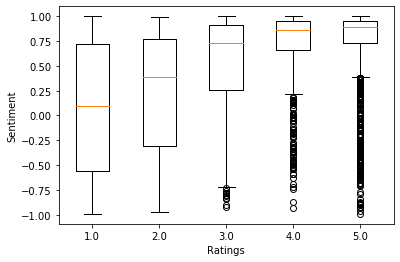

In [6]:
##############################################################################
# TODO: Your code below                                                    #
##############################################################################

draw_box_plot(rating_list, sentiment_list) # this draws the box plot below 


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Questions:
**From the box plot, what can you tell about the review sentiments and ratings? (What kind of properties can you identify)**

**Answer:**  
With a box plot, we can analyze the data that shows a distribution and relationship between ratings and sentiment. When the product received a rating of 1, the box plot has a median sentiment score close to 0.10, which is lower than all of the other box plots. However, the range between the 75th percentile and 25th percentile is larger than the ranges of the other boxes. With a rating of 1, it also shows it had a maxiumim at 1 and -1 for sentiment. With the rating of 5, it has the highest median value of sentiment at 0.90. It makes sense because positive language with a higher sentiment value will result with a higher rating. Besides showing the median value, the Interquartile Range (the whole box from 25th percentile to 75th percentile), the maxiumum and minimum sentiment values, it also shows any outliers (the dots) that did not fit the assumptions made on the box plot. 

### Repeat the same analysis for beer.csv and movie.csv separately.  
*For `beer.csv`, use `open("beer.csv", encoding="utf-8")` instead*  
*For movie, cast the review to the right type*

The correlation is: 
 [[1.         0.51653668]
 [0.51653668 1.        ]]


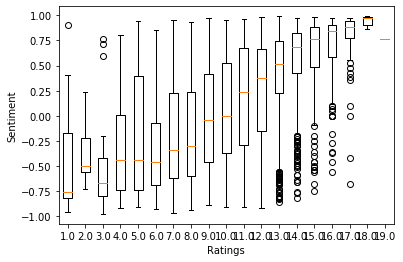

In [12]:
# For beer

##############################################################################
# TODO: Your code below                                                    #
##############################################################################

import csv 
csvfile = open("beer.csv",encoding="utf-8") # opens the csv file for beer, and encodes the file to a certain type

# create csv reader, and assign to an intermediate object
csv_reader = csv.reader(csvfile)

# cast the intermediate object to a list
beer = list(csv_reader)
# close the csv file
csvfile.close()


comments = []    # similar to before, it takes all the comments from the csv file and puts it into a list. 
for com in beer[1:5001]:
    comments.append(com[0])
#print(comments)

rating_list = [] 
for rate in beer[1:5001]:   # uses a for loop to get the values from element 1 to insert all the ratings into a separate list 
    rating_list.append(float(rate[1]))  # makes the contents a float so it will match the compound float values when we find the sentiment compound of the comments 

# print(rating_list) ##if want to print the ratings list

# feed comments into classifier and save sentiment

sid = SentimentIntensityAnalyzer()
sentiment_list = []
for sentence in comments:
    scores = sid.polarity_scores(sentence)['compound'] #takes only compound score
    sentiment_list.append(float(scores))  # turns the scores into float values and is added to the sentiment list
    
# print(sentiment_list, "\n") ## prints out the sentiment list


cor = np.corrcoef(rating_list,sentiment_list) # uses the numpy module corrcoef to find the correlation of the rating and sentiment 
print("The correlation is:",'\n',cor)

draw_box_plot(rating_list, sentiment_list) # draws the box plot



##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Questions:
**Compared to the previous box plot, what can you tell about the beer review sentiments and ratings? (Point out major differences)**

**Answer:**  
The previous box plot only had a 1-5 rating score because that was the range of the data's ratings. This box plot rating scale is 1-19 because in the csv file for beer, the ratings are on the scale of 1 to 19. In the previous one, we did not have negative sentiment values, so this boxplot is more accurate as it depicts a lower sentiment score to a lower rating. However, the boxplot for rating 2 has a higher median and Interquartile range than rating 3, so this might have skewed the correlation between ratings and sentiment by a little. The correlation factor for beer is 0.517 and is higher than the correlation factor of the amazon file. This shows that the language used and ratings given is more correlative than the ratings given in the amazon file. The boxplot also show less outliers than the boxplots in the amazon csv file analysis. 

The correlation is: 
 [[1.         0.39781475]
 [0.39781475 1.        ]]


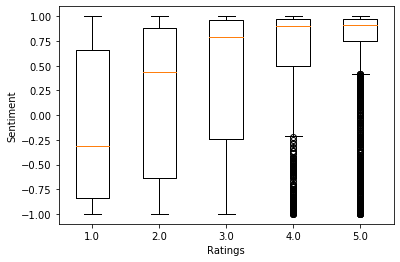

In [9]:
# For movie

##############################################################################
# TODO: Your code below                                                    #
##############################################################################

import csv 
csvfile = open("movie.csv","r")

# create csv reader, and assign to an intermediate object
csv_reader = csv.reader(csvfile)

# cast the intermediate object to a list
movie = list(csv_reader)
# close the csv file
csvfile.close()


comments = []
for com in movie[1:5001]: # similar to before, it takes all the comments from the csv file and puts it into a list.
    comments.append(com[0])
#print(comments)

rating_list = []
for rate in movie[1:5001]: # uses a for loop to get the values from element 1 to insert all the ratings into a separate list 
    rating_list.append(float(rate[1])) # makes the contents a float so it will match the compound float values when we find the sentiment compound of the comments 

# print(rating_list) ##if want to print the ratings list

# feed comments into classifier and save sentiment

sid = SentimentIntensityAnalyzer()
sentiment_list = []
for sentence in comments:
    scores = sid.polarity_scores(sentence)['compound'] #takes only compound score
    sentiment_list.append(float(scores)) # turns the scores into float values and is added to the sentiment list

# print(sentiment_list, "\n") ## prints out the sentiment list

cor = np.corrcoef(rating_list,sentiment_list) # uses the numpy module corrcoef to find the correlation of the rating and sentiment
print("The correlation is:",'\n',cor)

draw_box_plot(rating_list, sentiment_list) # draws the box plot


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/icranfield/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/icranfield/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The correlation is: 
 [[1.         0.41715484]
 [0.41715484 1.        ]]


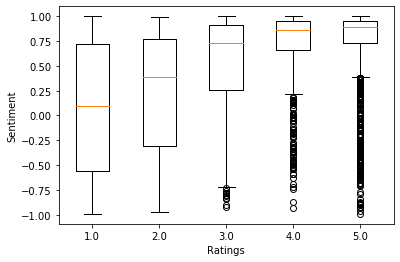

In [16]:
##### BONUS QUESTION ######
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import csv
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
pass
%matplotlib inline

def sentiment_analysis(x):
   
    def draw_box_plot(rating_list, sentiment_list): # function that creates the box plot
        import matplotlib.pyplot as plt
        rset = sorted(set(rating_list))
        sentall = []
        for r in rset:
            sentlist = []
            for i, rval in enumerate(rating_list):
                if (rval == r):
                    sentlist.append(sentiment_list[i])
            sentall.append(sentlist)

        plt.figure()
        plt.boxplot(sentall, labels=rset)
        plt.xlabel('Ratings')
        plt.ylabel('Sentiment')
    
    csvfile = open(x,encoding="utf-8") # create csv reader, and assign to an intermediate object
                                        # the x represents the given file name of the function that is being called
    csv_reader = csv.reader(csvfile) # cast the intermediate object to a list
    list_file = list(csv_reader) 
    csvfile.close()        # close the csv file

    comments = []
    for com in list_file[1:len(list_file)]: # adds the comments in a list called comments 
        comments.append(com[0])             # goes through the comments through the entire length of a given file
        
    rating_list = []
    for rate in list_file[1:len(list_file)]: # adds the ratings as float into rating_list within the file length
        rating_list.append(float(rate[1])) 
        
#     print(rating_list) ##if want to print the ratings list
    
    sid = SentimentIntensityAnalyzer()
    sentiment_list = []
    for sentence in comments:
        scores = sid.polarity_scores(sentence)['compound'] #prints only compund score and adds it in the sentiment_list
        sentiment_list.append(float(scores))
        
#     print(sentiment_list, "\n") ## prints out the sentiment list
    
    cor = np.corrcoef(rating_list,sentiment_list) # uses the numpy module corrcoef to find the correlation of the rating and sentiment 
    print("The correlation is:",'\n',cor)
    
    draw_box_plot(rating_list, sentiment_list) # calls the function to draw the box plot using rating_list and sentiment_list


sentiment_analysis("amazon.csv") # enter csv file name in a string



### Submit:
This .ipynb file with problems completed. Rename this file with your UID. For example: `123456789.ipynb`

And an HTML version of this file with the same name: `123456789.html`

*Your code must be commented.*